In [ ]:
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


# Exercise 1

In [ ]:
df=pd.read_csv("exam_question1.csv")
x1=df['x1']
x2=df['x2']
y=df['y']
df;

Consider the attached dataset, each row is a different athlete (runner) The 𝑥1 variable corresponds to the normalised body mass index and 𝑥2 to the lower-body power. 𝑦 is a binary variable, where 1 means that the athlete won a medal at the Olympics and 0 that the athlete didn't win any medal.

Compute the posterior distribution of the predicted probability that an athlete  with 𝑥1=0.01,𝑥2=0.008 will win a medal (use logistic regression).

Select the correct posterior from the list of images  (in particular select the closest image to the one you computed, the figure title is the label used in the multiple choice question).  To generate the histograms, I used "pyplot.hist" with bins=50. This question requires a rational: paste the code you used to compute and plot the posterior.

C

In [ ]:
with pm.Model() as logistic_model:        
    alpha  = pm.Normal('alpha', 0.0, sd=30)
    beta1  = pm.Normal('beta1',  0.0, sd=30)
    beta2  = pm.Normal('beta2',  0.0, sd=30)
    # complete the model
    mu   = pm.math.invlogit(alpha + beta1*x1 + beta2*x2)
    like = pm.Bernoulli("like",mu,observed=y)

with logistic_model:
    approx = pm.fit(80000)#ADVI method

posterior = approx.sample(10000)

Average Loss = 17.966: 100%|██████████| 80000/80000 [00:22<00:00, 3568.79it/s]
Finished [100%]: Average Loss = 17.952


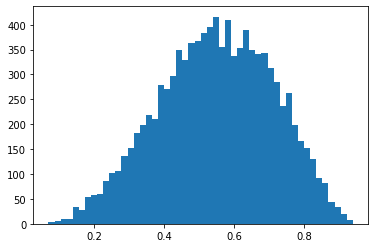

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(1/(1+np.exp(-(posterior['alpha'] + posterior['beta1']*0.01 + posterior['beta2']*0.008))), bins=)
plt.show()

# Exercise 2

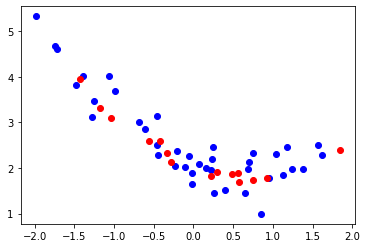

In [ ]:
df=pd.read_csv("exercise2_data_sensor1.csv")
x1=df['temperature']
y1=df['pressure']

df=pd.read_csv("exercise2_data_sensor2.csv")
x2=df['temperature']
y2=df['pressure']
plt.scatter(x1,y1,color='b',label="sensor 1")
plt.scatter(x2,y2,color='r',label="sensor 2")

The dataset (see scatter plot) reports measurements of temperature and pressure made using two different sensors (stored in the two csv different files below). The following measurement model is assumed for dataset 1 (sensor 1):

𝑝(𝑦𝑖|𝛼+𝛽𝑥𝑖)=𝑁(𝑦𝑖;𝛼+𝛽1𝑥𝑖+𝛽2𝑥2𝑖,𝜎1)
for the dataset 2 (sensor 2)

𝑝(𝑦𝑖|𝛼+𝛽𝑥𝑖)=𝑁(𝑦𝑖;𝛼+𝛽1𝑥𝑖+𝛽2𝑥2𝑖,𝜎2)
From the above model, you can notice that the difference between the two sensors' measurements is that 𝜎1≠𝜎2, that is the standard deviation of  the noise is different.
Your goal is to write a polynomial regression model that incorporates the measurements of both sensors
at the same time and estimate the parameters 𝛼,𝛽1,𝛽2 of the polynomial regression model.

What is  the posterior distribution of the prediction  at x=1.8? Select the correct posterior from the list of images  (select the closest image to the one you computed,  the figure title is the label used in the multiple choice question). To generate the histograms, I used "pyplot.hist" wit bins=50. This question requires a rational: paste the code you used to compute and plot the posterior.

B

In [ ]:
with pm.Model() as my_model:        
    alpha  = pm.Normal('alpha', 0.0, sd=30)
    beta1   = pm.Normal('beta1', 0.0, sd=30)
    beta2   = pm.Normal('beta2', 0.0, sd=30)
    sigma1 = pm.Uniform('sigma1', 0.0001, 30)
    sigma2 = pm.Uniform('sigma2', 0.0001, 30)
    #complete the model
    mu1 = alpha + beta1*x1 + beta2*x1**2
    mu2 = alpha + beta1*x2 + beta2*x2**2
    like1 = pm.Normal("like1",mu1,sigma1,observed=y1)
    like2 = pm.Normal("like2",mu2,sigma2,observed=y2)
   
with my_model:
    approx = pm.fit(80000)#ADVI
    
posterior = approx.sample(10000)

Average Loss = 34.033: 100%|██████████| 80000/80000 [00:52<00:00, 1522.51it/s]
Finished [100%]: Average Loss = 34.028


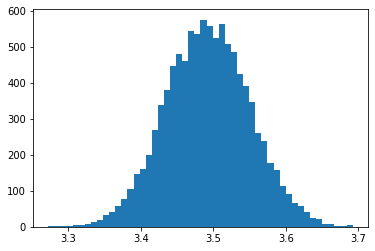

In [ ]:
plt.hist(posterior['alpha']+posterior['beta1']*(-1.2)+posterior['beta2']*(-1.2)**2,bins=50);

# Exercise 3

Consider the following probabilistic model model

Priors:
    
𝑝(𝛼)=Unif(𝛼,2,5)
𝑝(𝛾)=𝑁(𝛾;−3,3)
𝑝(𝜎)=Unif(𝜎,0.001,15)
Likelihood:
𝑝(𝑦|𝛼,𝛽,𝑥)=𝑁(𝑦;𝛾𝑥3𝛼+𝑥,𝜎)
What is the PyMC3 model implementing it?

D

In [ ]:
with pm.Model() as my_model:        
    alpha  = pm.Uniform('alpha', 2,5)
    gamma  = pm.Normal('gamma', -3.0, sd=3)
    sigma  = pm.Uniform('sigma', 0.001, 15)
    mu=gamma*x**3/(alpha+x)
    like = pm.Normal('likelihood', mu, sigma, observed=y)

# Exercise 4

Consider the following election poll for Ohio for the next US presidential election: 𝑛=640 polled adults, 340 supports Trump, 300 Biden. We want to compute the posterior probability of 𝜃, that is the chance that Trump will win in this State. We can model a two candidates election poll as a coin:  𝑛=640 tosses,  340 Heads and 300 Tails, so that 𝜃 is the probability of Head (the event Trump wins). Compute the posterior samples of 𝜃 and, using the posterior samples, compute 𝑃[𝜃>0.5].

This question requires a rational: paste the code you used to compute the posterior and 𝑃[𝜃>0.5].

 A. The computed 𝑃[𝜃>0.5] is a number belonging to the interval [0.5,0.6]
 B. The computed 𝑃[𝜃>0.5] is a number belonging to the interval [0.6,0.7]
 C. The computed 𝑃[𝜃>0.5] is a number belonging to the interval [0.8,0.9]
 D. The computed 𝑃[𝜃>0.5] is a number belonging to the interval [0.9,1]

 D


In [ ]:
y=np.hstack([np.ones(340),np.zeros(300)])
with pm.Model() as coin_model:
    # prior
    theta = pm.Uniform("theta", 0,1)
    #
    like = pm.Bernoulli("like",theta,observed=y)
    
with coin_model:    
    posterior = pm.sample(15000, tune=3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
100%|██████████| 18000/18000 [00:09<00:00, 1899.12it/s]


In [ ]:
len(np.where(posterior["theta"]>0.5)[0])/len(posterior["theta"])

0.9463333333333334

# Exercise 5

Given the results of 20 rolls of a dice [7,8,5,5,6,9], where 7 is the number of times the dice landed on one, 8 the number of times the dice landed on two and so on. Assume you implemented a PyMC3 model that computed 10000 posterior samples (posterior["theta"])  of the vector 𝜃=[𝜃1,𝜃2,…,𝜃6], where 𝜃𝑖 is the probability of face 𝑖 (and therefore ∑6𝑖=1𝜃𝑖=1). Note that, posterior["theta"].shape is (10000,6) and each row is a sample of the vector 𝜃 and so sums up to one. Compute the expected posterior probability that the next outcome is an even number ?

 A. len(posterior["theta"][:,1]+posterior["theta"][:,3]+posterior["theta"][:,5])/len(posterior["theta"])
 B. len(np.where(posterior["theta"]>0.5)[0])/len(posterior["theta"])
 C. np.mean(posterior["theta"])
 D. np.mean(posterior["theta"][:,1]+posterior["theta"][:,3]+posterior["theta"][:,5])
 E. None

 D

In [ ]:
np.mean(posterior["theta"][:,1]+posterior["theta"][:,3]+posterior["theta"][:,5])


Note that `len(posterior["theta"][:,1]+posterior["theta"][:,3]+posterior["theta"][:,5])/len(posterior["theta"])`
is always equal to one, see the following random egenrated example

In [ ]:
posttheta=np.random.rand(10000,6)
posttheta=posttheta/(np.sum(posttheta,axis=1)[:,None])
len(posttheta[:,1]+posttheta[:,3]+posttheta[:,5])/len(posttheta)

1.0

# Exercise 6

In 1D polynomial regression, we consider the following regression function

𝑓(𝑥)=𝑤0+𝑤1𝑥+𝑤2𝑥2+⋯+𝑤𝑑𝑥𝑑
where 𝑑 is the degree of the polynomial and 𝑤𝑖 are the unknown coefficients (that we aim to learn from data, we usually assume a prior 𝑝(𝑤𝑖)=𝑁(𝑤𝑖;0,30)). In many applications, the regression function is periodic, see for instance the attached dataset (scatter plot below)  that reports the water consumption in 5 days.

To solve a regression problem involving a periodic function, we use the following model

𝑓(𝑥)=𝑤0+𝑤1cos(2𝜋𝑥)+𝑤2cos(4𝜋𝑥)+𝑤3cos(6𝜋𝑥)+⋯+𝑤𝑑cos(2𝑑𝜋𝑥)
 where 𝑑 is a integer that determines the period of the cosine term, so 𝑓(𝑥) is a combination of periodic functions with different period.  Also in this case we assume the prior 𝑝(𝑤𝑖)=𝑁(𝑤𝑖;0,30) for the unknown weights.

Assume 𝑑=4 that is

𝑓(𝑥)=𝑤0+𝑤1cos(2𝜋𝑥)+𝑤2cos(4𝜋𝑥)+𝑤3cos(6𝜋𝑥)+𝑤4cos(8𝜋𝑥)
and a Gaussian noise for the likelihood, write a Pymc3 model that computes the posterior prediction of 𝑓 at 𝑥=6?

Select the correct posterior from the list of images  (select the closest image to the one you computed,  the figure title is the label used in the multiple choice question). To generate the histograms, I used "pyplot.hist" wit bins=50. This question requires a rational: paste the code you used to compute and plot the posterior.

Hints: if you work with a matrix form (or  vector) then be sure that the dimensions are correct

B


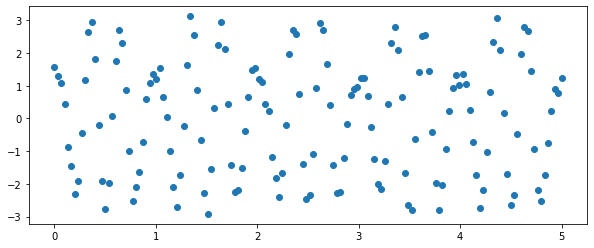

In [ ]:
df=pd.read_csv("exam_question6.csv")
x=df['x']
y=df['y']
plt.figure(figsize=(10,4))
plt.scatter(x,y)

In [ ]:
xp=x[:,None]
X=np.hstack([np.ones((xp.shape[0],1)),np.cos(2*np.pi*xp),np.cos(4*np.pi*xp),np.cos(6*np.pi*xp),np.cos(8*np.pi*xp)])

with pm.Model() as my_model:        
    beta  = pm.Normal('beta', 0.0, 30, shape=(5,) ) #, testval=np.random.randn(5))
    sigma = pm.Uniform('sigma', 0.0001, 30)
    #complete the model
    mu = pm.math.dot(X, beta)
    like = pm.Normal("like", mu, sigma, observed=y)

with my_model:
    posterior=pm.sample(15000,tune=2000,chains=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, beta]
100%|██████████| 17000/17000 [00:15<00:00, 1089.44it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [ ]:
with my_model:
    approx = pm.fit(80000)#ADVI
    
posterior = approx.sample(10000)

Average Loss = -2.4787: 100%|██████████| 80000/80000 [00:46<00:00, 1729.34it/s]
Finished [100%]: Average Loss = -2.4778


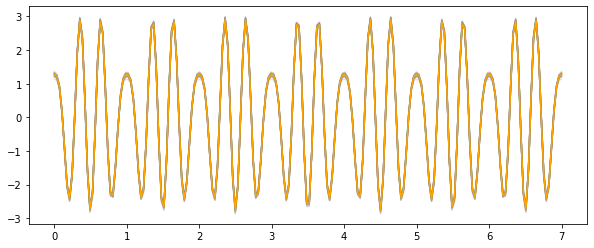

In [ ]:
xp=np.linspace(0,7,200)[:,None]
X=np.hstack([np.ones((xp.shape[0],1)),np.cos(2*np.pi*xp),np.cos(4*np.pi*xp),np.cos(6*np.pi*xp),np.cos(8*np.pi*xp)])

plt.figure(figsize=(10,4))
for i in range(20):
    plt.plot(xp,np.dot(X,posterior['beta'][i]),c='gray',alpha=0.2)#regression line
plt.plot(xp,np.dot(X,posterior['beta'].mean(axis=0)),c='orange')

(array([  2.,   0.,   1.,   2.,   2.,   8.,   9.,   8.,  12.,  24.,  31.,
         50.,  86., 108., 145., 156., 218., 305., 322., 400., 465., 525.,
        564., 599., 599., 618., 602., 648., 575., 519., 451., 411., 341.,
        290., 233., 200., 137.,  99.,  77.,  62.,  35.,  22.,  13.,   8.,
          8.,   5.,   2.,   1.,   1.,   1.]),
 array([1.08966925, 1.0972942 , 1.10491916, 1.11254412, 1.12016908,
        1.12779404, 1.13541899, 1.14304395, 1.15066891, 1.15829387,
        1.16591883, 1.17354378, 1.18116874, 1.1887937 , 1.19641866,
        1.20404362, 1.21166857, 1.21929353, 1.22691849, 1.23454345,
        1.24216841, 1.24979336, 1.25741832, 1.26504328, 1.27266824,
        1.2802932 , 1.28791815, 1.29554311, 1.30316807, 1.31079303,
        1.31841799, 1.32604294, 1.3336679 , 1.34129286, 1.34891782,
        1.35654278, 1.36416773, 1.37179269, 1.37941765, 1.38704261,
        1.39466757, 1.40229252, 1.40991748, 1.41754244, 1.4251674 ,
        1.43279236, 1.44041731, 1.44804227, 1.

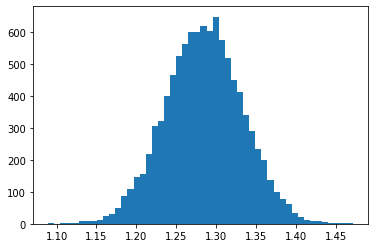

In [ ]:
xp=6
X=np.hstack([1,np.cos(2*np.pi*xp),np.cos(4*np.pi*xp),np.cos(6*np.pi*xp),np.cos(8*np.pi*xp)])
plt.hist(np.dot(X,posterior['beta'].T),bins=50)